In [6]:
#Install these libraries if it is necessary. They are need for answers the questions.
!pip install yfinance==0.2.4
!pip install pandas==1.3.3
!pip install beautifulsoup4
!pip install requests
!pip install matplotlib
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 21.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[

In [ ]:
# Question 1 - Extracting Tesla Stock Data Using yfinance

In [7]:
import yfinance as yf
import pandas as pd

In [9]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(drop=True, inplace=True)
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [39]:
import requests
from bs4 import BeautifulSoup

In [74]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, "html.parser")
tsla_df = pd.read_html('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm')
table = tsla_df[0]
table.tail()

,Tesla Annual Revenue(Millions of US $),Tesla Annual Revenue(Millions of US $).1
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [ ]:
#Question 3 - Extracting GameStop Stock Data Using yfinance

In [61]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
#Question 4: Use Webscraping to Extract GME Revenue Data

In [82]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [2]:
#Question 5: Plot Tesla Stock Graph

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
gme_data = gme.history(period="max")  # Get max historical data

# Plotting the Tesla stock data
plt.figure(figsize=(10, 6))
plt.plot(tesla_data.index, tesla_data['Close'], color='blue', label='Close Price')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Question 6: Plot GameStop Stock Graph

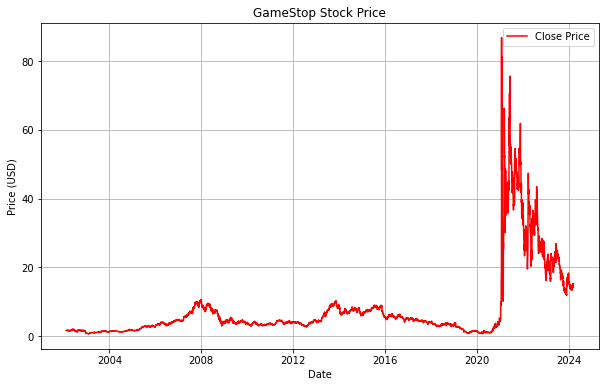

In [29]:
gme_data = gme.history(period="max")  # Get max historical data

# Plotting the GameStop stock data
plt.figure(figsize=(10, 6))
plt.plot(gme_data.index, gme_data['Close'], color='red', label='Close Price')
plt.title('GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()